In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [23]:
data = pd.read_csv("../DatasetTwitter/dataset.csv", header=None)
print(data.head())

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


<AxesSubplot: ylabel='Frequency'>

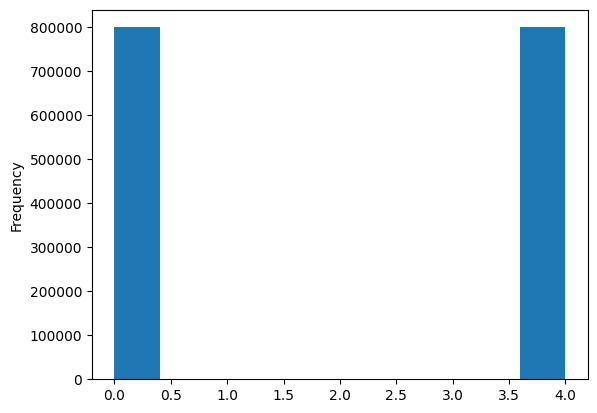

In [24]:
data[0].plot.hist()

In [25]:
data[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiment of tweet')

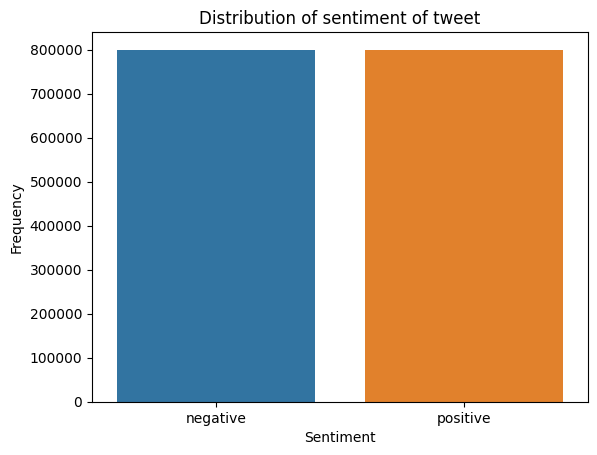

In [26]:
# 0 = negative, 4 = positive
sns.countplot(pd.DataFrame({"negative": range(800000), "positive": range(800000)}))
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of sentiment of tweet")

In [30]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', 'URL', text)
    text = re.sub(r"#\S+|\s#\S+", ' hashtag', text)
    text = re.sub(r"@\S+|\s@\S+", ' entity', text)
    for emoji in emojis.keys():
            text = text.replace(emoji, "EMOJI" + emojis[emoji])    
    return text.strip()

data[5][0], preprocess_text(data[5][0])

("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "entity URL - awww, that's a bummer.  you shoulda got david carr of third day to do it. EMOJIwink")

## Bert results

Text(0.5, 1.0, 'Development of accuracy for Bert Model')

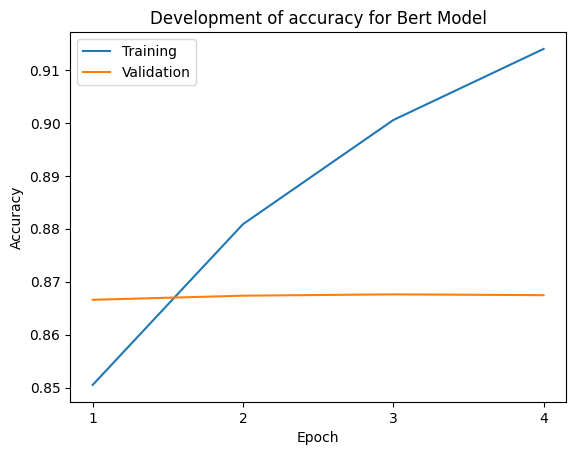

In [36]:
epoch = [1, 2, 3, 4]
training_acc = [0.8505188492063491, 0.8808710317460318, 0.9005267857142857, 0.913953373015873]
val_acc = [0.8665892857142857, 0.8673660714285715, 0.8676160714285714, 0.8674642857142858]

plt.plot(epoch, training_acc, label="Training")
plt.plot(epoch, val_acc, label="Validation")
plt.xticks(epoch)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Development of accuracy for Bert Model")